In [1]:
from matplotlib import pyplot as plt
import seaborn as sns

import pandas as pd
import datetime
import swifter
import numpy as np

from tqdm.notebook import tqdm

In [2]:
path_to_data = '../data/'

In [3]:
columns_to_read = ['timestamp', 'client', 'session_id']

In [5]:
test_df = pd.read_csv(path_to_data + 'alfabattle2_prediction_session_timestamp.csv', parse_dates=['timestamp'])

In [6]:
test_df.head(2)

,client_pin,timestamp
0,f0c674b2bb4dc64be607029271d706ec,2020-08-01 00:00:53
1,90725b54ce77576883813d87749df6bd,2020-08-01 00:02:57


In [37]:
df_list = []
for i in tqdm(range(10)):
    sample_click_stream = pd.read_parquet(path_to_data + 'alfabattle2_abattle_clickstream/part-0000' + str(i) + '.parquet', columns=columns_to_read)
    sample_click_stream = sample_click_stream.drop_duplicates(subset=["client"], keep='last')
    df_list.append(test_df.merge(sample_click_stream, how='inner', left_on='client_pin', right_on='client'))

In [17]:
df_list

[                 timestamp_x                            client  \
 0    2020-08-10 20:41:38.681  9f6f272693c2dbc043028b02271f7113   
 1    2020-09-02 13:54:27.155  10fbdb1d10dd6f358494977450787dee   
 2    2020-08-05 12:09:45.039  6fe7f09c42c954028385511e52f3224c   
 3    2020-09-16 06:28:46.042  89ad1b91d02210ec98e845fa90520b9e   
 4    2020-08-15 12:56:24.670  8b975100f94c4780ed2b597172a49f93   
 ...                      ...                               ...   
 8206 2020-01-06 18:44:51.000  8b5d99de1b9312c45916c25166e7f801   
 8207 2020-01-08 14:13:03.000  f55c7b6914c59800af0116b284d936f6   
 8208 2020-02-05 12:19:26.700  2dc44a0c84e3285a8513e6fb19c29e71   
 8209 2020-03-19 20:10:05.581  7d95b82db3d5fec1d26574ebbc3a0e8e   
 8210 2020-05-09 11:16:52.582  6fa97bc5a5ac4b88274e07a61988a4f8   
 
                             session_id                        client_pin  \
 0     6407a55711e3d7087e9eb00a137401c7                               NaN   
 1     b99088ee3a7cabc44c090543c278b9e4 

In [38]:
result_df = pd.concat(df_list, axis=0)

In [39]:
result_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79268 entries, 0 to 7944
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   client_pin   79268 non-null  object        
 1   timestamp_x  79268 non-null  datetime64[ns]
 2   timestamp_y  79268 non-null  datetime64[ns]
 3   client       79268 non-null  object        
 4   session_id   79268 non-null  object        
dtypes: datetime64[ns](2), object(3)
memory usage: 3.6+ MB


In [40]:
result_df = result_df.dropna(how='any', axis=0)

In [47]:
result_df['time_diff'] = (result_df['timestamp_x'] - result_df['timestamp_y']).apply(lambda x: x.days)

<AxesSubplot:>

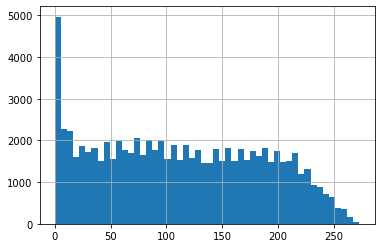

In [48]:
result_df['time_diff'].hist(bins=50)

In [12]:
sample_click_stream

,timestamp,client,session_id
4770986,2020-08-10 20:41:38.681,9f6f272693c2dbc043028b02271f7113,6407a55711e3d7087e9eb00a137401c7
6880819,2020-09-02 13:54:27.155,10fbdb1d10dd6f358494977450787dee,b99088ee3a7cabc44c090543c278b9e4
6920969,2020-08-05 12:09:45.039,6fe7f09c42c954028385511e52f3224c,1633c20dc9e2464060a287e77f729731
6931525,2020-09-16 06:28:46.042,89ad1b91d02210ec98e845fa90520b9e,7e0d9d1ae488e9ad52f0912a3416cd97
6932028,2020-08-15 12:56:24.670,8b975100f94c4780ed2b597172a49f93,a7cbe2530cc8ccf13e61c4a4392c55f4
...,...,...,...
12468584,2020-01-06 18:44:51.000,8b5d99de1b9312c45916c25166e7f801,ba2715d35792eeed081304be43f34d1d
12468586,2020-01-08 14:13:03.000,f55c7b6914c59800af0116b284d936f6,04b72ace9e138d385fc5fead177eecff
12468589,2020-02-05 12:19:26.700,2dc44a0c84e3285a8513e6fb19c29e71,0c3e91dd8cf075d330f8f83353cb7d91
12468592,2020-03-19 20:10:05.581,7d95b82db3d5fec1d26574ebbc3a0e8e,42b9a039ec978fdc0f6dcc6cf7f97f0c
